In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
!wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

--2022-12-20 18:50:39--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2022-12-20 18:50:39--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbf4523565219ad53e126151d55.dl.dropboxusercontent.com/zip_download_get/BWaz72nazXApLDusfa6zFKLizNsMmgqJ1N0UCVDB11QiH-AF99aMKpb9yCrGDiek_P2DnN1MFImRoJsTB82vewQB3fnC4GrPw-IQ18V3vcdXfw# [following]
--2022-12-20 18:50:40--  https://ucbf4523565219ad53e126151d55.dl.dropboxusercontent.com/zip_download_get/BWaz72nazXApLDusfa6zFKLizNsMmgqJ1N0UCVDB11QiH-AF99aMKpb9yCrGDiek_P2DnN1MFImRoJsTB82vewQB3fnC4GrPw

In [27]:
!unzip data -d "images/"

Archive:  data
mapname:  conversion of  failed
replace images/Train/Pikachu/345.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/Train/Pikachu/303.jpg  
 extracting: images/Train/Pikachu/341.jpg  
 extracting: images/Train/Pikachu/298.jpg  
 extracting: images/Train/Pikachu/389.jpg  
 extracting: images/Train/Pikachu/382.jpg  
 extracting: images/Train/Pikachu/306.j

In [28]:
classes = os.listdir("images/Train")
classes

['Charmander', 'Bulbasaur', 'Pikachu']

In [29]:
print("Training Data:")
for f in classes:
    path = "images/Train/" + f
    print(f"{f} - {len(os.listdir(path))}")

Training Data:
Charmander - 102
Bulbasaur - 101
Pikachu - 101


In [30]:
print("Test Data:")
for f in classes:
    path = "images/Test/" + f
    print(f"{f} - {len(os.listdir(path))}")

Test Data:
Charmander - 42
Bulbasaur - 41
Pikachu - 40


# Data Loading

In [31]:
from keras_preprocessing import image

In [32]:
train_data = [] # X
train_labels = [] # Y

for category in classes:
    folder = f"images/Train/{category}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        
        img = image.load_img(img_path, target_size=(100,100))
        img = image.img_to_array(img)
        train_data.append(img)
        train_labels.append(category)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [33]:
len(train_data)

304

In [34]:
len(train_labels)

304

# Data Preprocessing

In [35]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [36]:
train_data.shape

(304, 100, 100, 3)

In [37]:
train_labels.shape

(304,)

In [38]:
train_data = train_data.reshape(len(train_data), 30000)
train_data.shape

(304, 30000)

In [39]:
category2label = {'Pikachu':0, 'Charmander':1, 'Bulbasaur':2}
label2category = {0: 'Pikachu', 1: 'Charmander', 2:'Bulbasaur'}

In [40]:
train_labels = np.array([category2label[label] for label in train_labels])

In [41]:
train_labels.shape

(304,)

In [42]:
from keras.utils import to_categorical

In [43]:
train_labels = to_categorical(train_labels)

In [44]:
train_labels.shape

(304, 3)

In [45]:
train_labels[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [46]:
train_labels[-5:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Model Architecture

In [47]:
from keras.layers import Dense
from keras import Sequential

In [48]:
features = train_data.shape[1]

In [49]:
model = Sequential()
model.add( Dense(units=512, activation='relu', input_shape=(features,)) )
model.add( Dense(units=256, activation='relu' ) )
model.add( Dense(units=128, activation='relu' ) )
model.add( Dense(units=64, activation='relu' ) )
model.add( Dense(units=3, activation='softmax' ) )

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'] )

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               15360512  
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15,533,187
Trainable params: 15,533,187
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(train_data, train_labels, batch_size=32, epochs=50)

Epoch 1/50
10/10 [==============================] - 2s 96ms/step - loss: 3198.1121 - accuracy: 0.3717
Epoch 2/50
10/10 [==============================] - 1s 95ms/step - loss: 1528.6217 - accuracy: 0.3783
Epoch 3/50
10/10 [==============================] - 1s 96ms/step - loss: 1055.1625 - accuracy: 0.4770
Epoch 4/50
10/10 [==============================] - 1s 97ms/step - loss: 1239.6504 - accuracy: 0.5099
Epoch 5/50
10/10 [==============================] - 1s 93ms/step - loss: 885.7883 - accuracy: 0.5691
Epoch 6/50
10/10 [==============================] - 1s 96ms/step - loss: 375.4841 - accuracy: 0.6875
Epoch 7/50
10/10 [==============================] - 1s 92ms/step - loss: 115.2983 - accuracy: 0.7829
Epoch 8/50
10/10 [==============================] - 1s 95ms/step - loss: 55.2205 - accuracy: 0.8651
Epoch 9/50
10/10 [==============================] - 1s 94ms/step - loss: 42.2872 - accuracy: 0.8849
Epoch 10/50
10/10 [==============================] - 1s 94ms/step - loss: 43.1110 - accur

# Test data

In [52]:
test_data = [] # X
test_labels = [] # Y

for category in classes:
    folder = f"images/Test/{category}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        
        img = image.load_img(img_path, target_size=(100,100))
        img = image.img_to_array(img)
        test_data.append(img)
        test_labels.append(category)

In [53]:
len(test_data)

123

In [55]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [56]:
test_data.shape

(123, 100, 100, 3)

In [59]:
# test_labels

In [58]:
test_labels = np.array([category2label[label] for label in test_labels])
test_labels = to_categorical(test_labels)
test_labels.shape

(123, 3)

In [60]:
test_data = test_data.reshape(len(test_data), 30000)
test_data.shape

(123, 30000)

In [61]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 69ms/step - loss: 18.2205 - accuracy: 0.9756


[18.220497131347656, 0.9756097793579102]

In [62]:
# 123*0.97

119.31

In [66]:
pred = model.predict(test_data).argmax(axis=1)

4/4 [==============================] - 0s 31ms/step


In [67]:
pred[:10]

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [69]:
# [label2category[p] for p in pred]

# Prediction for 1 image

In [91]:
test_img = "images/Test/Charmander/2201.jpg"

img = image.load_img(test_img, target_size=(100,100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

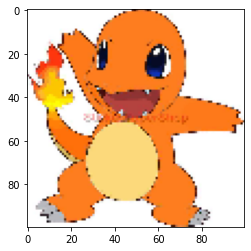

In [92]:
plt.imshow(img.astype('int'));

In [93]:
img = img.reshape(1, 30000)
img.shape

(1, 30000)

In [94]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 27ms/step


'Charmander'